In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws
ws.filterwarnings('ignore')

In [2]:
df=pd.read_csv('balanced_whey_quality_dataset.csv')
df

,product_id,product_type,protein_pct,carbs_g,fat_g,lactose_pct,ash_pct,moisture_pct,bcaa_g,leucine_g,...,odor_score,flavor_score,lead_ppm,cadmium_ppm,tpc_cfu,ftir_pc1,ftir_pc2,ftir_pc3,quality_score,quality_label
0,WPB1,concentrate,78.51,0.00,2.41,0.00,5.09,4.16,17.60,6.53,...,5.129983,7.394710,0.0004,0.0015,2.0,9.046,-0.177,-0.922,73.14,Medium
1,WPB2,blend,64.59,4.94,2.04,2.44,2.65,5.93,16.29,5.70,...,2.680121,2.469242,0.0141,0.0067,10.0,7.002,-0.856,0.066,28.04,Low
2,WPB3,concentrate,89.41,3.18,2.16,0.00,5.74,4.15,21.27,8.37,...,8.414355,7.676068,0.0117,0.0006,1.0,8.327,-0.793,-0.708,83.19,High
3,WPB4,blend,54.40,5.74,4.05,0.86,2.94,3.32,14.25,4.99,...,2.282427,2.928271,0.0012,0.0058,1.0,5.035,0.918,-0.480,38.02,Low
4,WPB5,isolate,74.34,6.99,1.79,0.00,3.75,3.49,14.22,5.24,...,6.866567,4.936368,0.0170,0.0050,16.0,7.539,-0.867,-0.002,57.99,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,WPB9995,blend,80.63,6.81,3.31,4.04,4.32,3.69,15.79,5.43,...,6.687224,5.133336,0.0093,0.0094,0.0,7.679,-0.296,0.657,68.38,medium
9995,WPB9996,concentrate,82.72,4.64,2.63,4.15,3.62,4.98,19.18,7.11,...,6.638765,6.268250,0.0009,0.0048,11.0,9.068,-0.431,0.746,59.47,Medium
9996,WPB9997,blend,68.73,6.23,5.74,3.13,2.58,4.80,13.28,4.77,...,6.568490,5.467724,0.0000,0.0008,3.0,5.238,1.522,0.108,62.71,medium
9997,WPB9998,concentrate,91.26,1.94,3.93,3.04,4.81,3.54,18.16,7.06,...,8.791094,7.695731,0.0455,0.0022,17.0,8.613,1.277,0.683,82.58,High


In [3]:
df.shape

(9999, 23)

In [4]:
df.head()

,product_id,product_type,protein_pct,carbs_g,fat_g,lactose_pct,ash_pct,moisture_pct,bcaa_g,leucine_g,...,odor_score,flavor_score,lead_ppm,cadmium_ppm,tpc_cfu,ftir_pc1,ftir_pc2,ftir_pc3,quality_score,quality_label
0,WPB1,concentrate,78.51,0.00,2.41,0.00,5.09,4.16,17.60,6.53,...,5.129983,7.394710,0.0004,0.0015,2.0,9.046,-0.177,-0.922,73.14,Medium
1,WPB2,blend,64.59,4.94,2.04,2.44,2.65,5.93,16.29,5.70,...,2.680121,2.469242,0.0141,0.0067,10.0,7.002,-0.856,0.066,28.04,Low
2,WPB3,concentrate,89.41,3.18,2.16,0.00,5.74,4.15,21.27,8.37,...,8.414355,7.676068,0.0117,0.0006,1.0,8.327,-0.793,-0.708,83.19,High
3,WPB4,blend,54.40,5.74,4.05,0.86,2.94,3.32,14.25,4.99,...,2.282427,2.928271,0.0012,0.0058,1.0,5.035,0.918,-0.480,38.02,Low
4,WPB5,isolate,74.34,6.99,1.79,0.00,3.75,3.49,14.22,5.24,...,6.866567,4.936368,0.0170,0.0050,16.0,7.539,-0.867,-0.002,57.99,Medium


In [5]:
df.tail()

,product_id,product_type,protein_pct,carbs_g,fat_g,lactose_pct,ash_pct,moisture_pct,bcaa_g,leucine_g,...,odor_score,flavor_score,lead_ppm,cadmium_ppm,tpc_cfu,ftir_pc1,ftir_pc2,ftir_pc3,quality_score,quality_label
9994,WPB9995,blend,80.63,6.81,3.31,4.04,4.32,3.69,15.79,5.43,...,6.687224,5.133336,0.0093,0.0094,0.0,7.679,-0.296,0.657,68.38,medium
9995,WPB9996,concentrate,82.72,4.64,2.63,4.15,3.62,4.98,19.18,7.11,...,6.638765,6.268250,0.0009,0.0048,11.0,9.068,-0.431,0.746,59.47,Medium
9996,WPB9997,blend,68.73,6.23,5.74,3.13,2.58,4.80,13.28,4.77,...,6.568490,5.467724,0.0000,0.0008,3.0,5.238,1.522,0.108,62.71,medium
9997,WPB9998,concentrate,91.26,1.94,3.93,3.04,4.81,3.54,18.16,7.06,...,8.791094,7.695731,0.0455,0.0022,17.0,8.613,1.277,0.683,82.58,High
9998,WPB9999,isolate,68.59,7.31,4.51,1.96,3.47,3.40,15.91,5.99,...,4.594987,5.077863,0.0221,0.0003,15.0,5.317,0.016,-0.631,30.71,Low


In [6]:
df.columns

Index(['product_id', 'product_type', 'protein_pct', 'carbs_g', 'fat_g',
       'lactose_pct', 'ash_pct', 'moisture_pct', 'bcaa_g', 'leucine_g',
       'solubility_index', 'denaturation_pct', 'pdcaas', 'odor_score',
       'flavor_score', 'lead_ppm', 'cadmium_ppm', 'tpc_cfu', 'ftir_pc1',
       'ftir_pc2', 'ftir_pc3', 'quality_score', 'quality_label'],
      dtype='object')

In [7]:
df.dtypes

product_id           object
product_type         object
protein_pct         float64
carbs_g             float64
fat_g               float64
lactose_pct         float64
ash_pct             float64
moisture_pct        float64
bcaa_g              float64
leucine_g           float64
solubility_index    float64
denaturation_pct    float64
pdcaas              float64
odor_score          float64
flavor_score        float64
lead_ppm            float64
cadmium_ppm         float64
tpc_cfu             float64
ftir_pc1            float64
ftir_pc2            float64
ftir_pc3            float64
quality_score       float64
quality_label        object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        9999 non-null   object 
 1   product_type      9999 non-null   object 
 2   protein_pct       9999 non-null   float64
 3   carbs_g           9979 non-null   float64
 4   fat_g             9927 non-null   float64
 5   lactose_pct       9948 non-null   float64
 6   ash_pct           9999 non-null   float64
 7   moisture_pct      9999 non-null   float64
 8   bcaa_g            9999 non-null   float64
 9   leucine_g         9999 non-null   float64
 10  solubility_index  9999 non-null   float64
 11  denaturation_pct  9999 non-null   float64
 12  pdcaas            9999 non-null   float64
 13  odor_score        9999 non-null   float64
 14  flavor_score      9999 non-null   float64
 15  lead_ppm          9999 non-null   float64
 16  cadmium_ppm       9999 non-null   float64


In [9]:
df.describe()

,protein_pct,carbs_g,fat_g,lactose_pct,ash_pct,moisture_pct,bcaa_g,leucine_g,solubility_index,denaturation_pct,pdcaas,odor_score,flavor_score,lead_ppm,cadmium_ppm,tpc_cfu,ftir_pc1,ftir_pc2,ftir_pc3,quality_score
count,9999.000000,9979.000000,9927.000000,9948.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9990.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,72.674986,5.070837,3.080786,4.160919,3.997826,3.992046,15.994777,6.070298,68.447844,16.644221,0.783248,5.988045,6.003220,0.010067,0.003063,11.788488,6.777462,-0.186748,0.029789,63.047794
std,14.477066,2.890098,1.888475,2.754555,1.010159,0.981352,3.531284,1.391902,19.859301,11.706119,0.151741,2.267195,2.288025,0.009850,0.003010,16.498304,1.786053,0.909787,0.833295,23.684166
min,31.320000,0.000000,0.000000,0.000000,1.000000,0.590000,6.280000,2.180000,14.007141,0.000000,0.400000,1.000000,1.000000,0.000000,0.000000,0.000000,0.235000,-3.546000,-2.681000,20.010000
25%,59.910000,2.960000,1.640000,2.070000,3.310000,3.330000,13.180000,4.970000,51.829349,6.550200,0.647099,4.194612,4.184614,0.002900,0.000900,3.000000,5.509500,-0.788500,-0.548000,41.820000
50%,74.830000,5.030000,3.020000,3.990000,3.990000,3.990000,16.290000,6.150000,70.140976,14.695169,0.799510,6.039017,6.048505,0.007100,0.002200,7.000000,6.916000,-0.188000,0.007000,64.680000
75%,86.050000,7.020000,4.360000,6.060000,4.670000,4.670000,18.720000,7.110000,86.811932,25.072058,0.935968,7.870839,7.924062,0.014000,0.004300,14.000000,8.111000,0.420000,0.585000,85.060000
max,97.800000,16.190000,10.000000,14.650000,8.360000,7.850000,26.060000,10.010000,100.000000,58.799025,1.000000,10.000000,10.000000,0.110600,0.029900,342.000000,12.120000,3.053000,3.347000,99.990000


In [10]:
df.describe(include='O')

,product_id,product_type,quality_label
count,9999,9999,9999
unique,9999,3,4
top,WPB1,isolate,Low
freq,1,3352,3333


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isna().sum()

product_id           0
product_type         0
protein_pct          0
carbs_g             20
fat_g               72
lactose_pct         51
ash_pct              0
moisture_pct         0
bcaa_g               0
leucine_g            0
solubility_index     0
denaturation_pct     0
pdcaas               0
odor_score           0
flavor_score         0
lead_ppm             0
cadmium_ppm          0
tpc_cfu              9
ftir_pc1             0
ftir_pc2             0
ftir_pc3             0
quality_score        0
quality_label        0
dtype: int64

In [13]:
df['product_type'].unique()

array(['concentrate', 'blend', 'isolate'], dtype=object)

In [14]:
df['quality_label'].unique()

array(['Medium', 'Low', 'High', 'medium'], dtype=object)

In [15]:
df['quality_label']=df['quality_label'].str.replace('medium',"Medium")

In [16]:
df['quality_label'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

Text(0.5, 1.0, 'Count of Product Type')

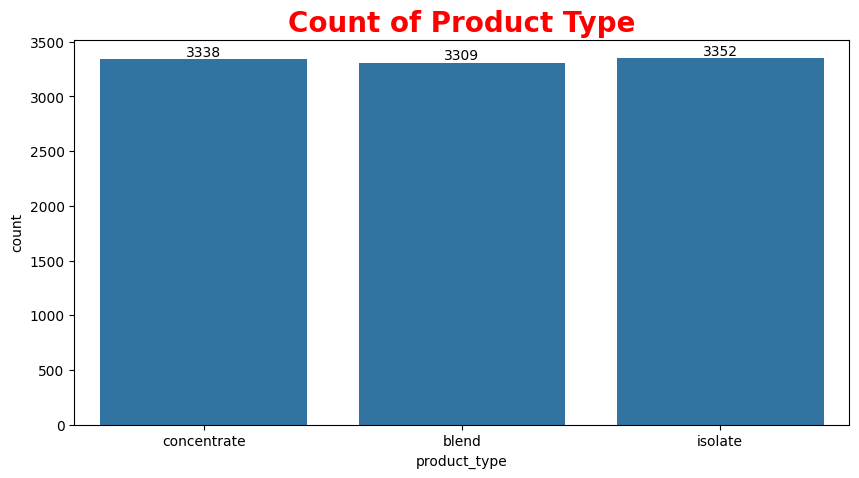

In [17]:
plt.figure(figsize=(10,5))
a=sns.countplot(x=df['product_type'],data=df)
a.bar_label(a.containers[0],fmt='%d')
plt.title("Count of Product Type",color='r',fontsize=20,fontweight='bold')

Text(0.5, 1.0, 'Count of Quality Label')

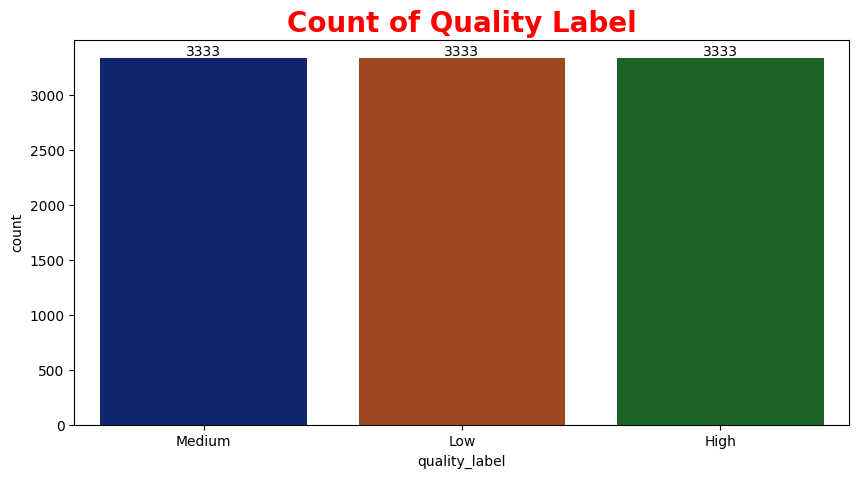

In [18]:
plt.figure(figsize=(10,5))
a=sns.countplot(x=df['quality_label'],data=df,palette='dark')
for container in a.containers:
    a.bar_label(container,fmt="%d")
plt.title("Count of Quality Label",fontsize=20,color="r",fontweight='bold')

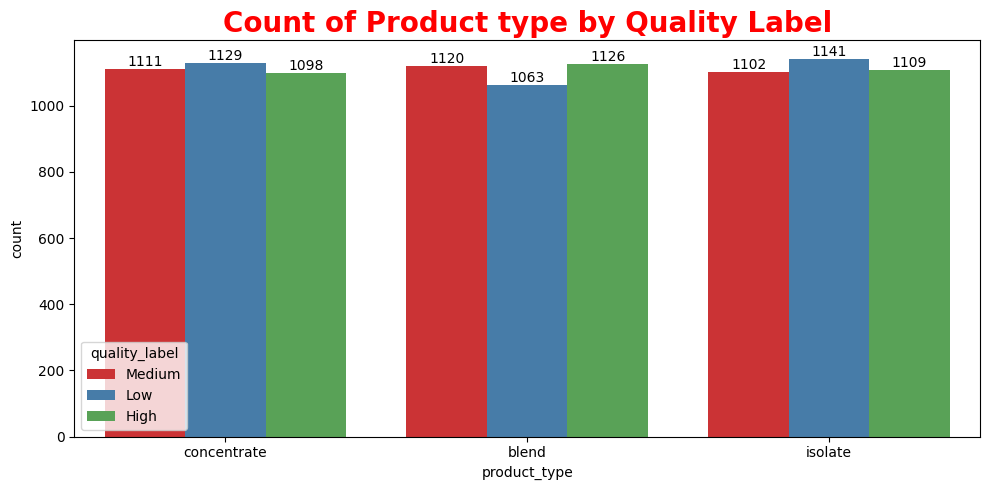

In [19]:
plt.figure(figsize=(10,5))
a=sns.countplot(x=df['product_type'],data=df,hue='quality_label',palette='Set1')
for container in a.containers:
    a.bar_label(container,fmt="%d")
plt.title("Count of Product type by Quality Label",fontsize=20,color="r",fontweight='bold')
plt.tight_layout()

In [20]:
protein_range=df.groupby('quality_label',as_index=False) ['protein_pct'].mean().sort_values(by='protein_pct')
protein_range

,quality_label,protein_pct
1,Low,55.169493
2,Medium,74.868335
0,High,87.987132


Text(0, 0.5, 'protein per 100 gm')

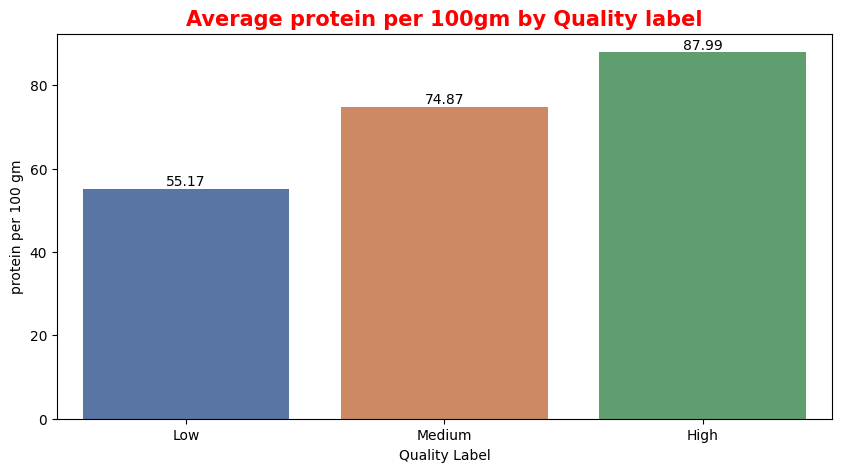

In [21]:
plt.figure(figsize=(10,5))
a=sns.barplot(x=protein_range['quality_label'],y=protein_range['protein_pct'],palette='deep')
for container in a.containers:
    a.bar_label(container,fmt="%.2f")
plt.title("Average protein per 100gm by Quality label",color='r',fontsize=15,fontweight='bold')
plt.xlabel('Quality Label')
plt.ylabel('protein per 100 gm')

In [22]:
solub=df.groupby('quality_label',as_index=False) ['solubility_index'].mean()\
    .sort_values(by='solubility_index')
solub

,quality_label,solubility_index
1,Low,45.154054
2,Medium,70.186210
0,High,90.003269


Text(0.5, 0, 'solubility_index')

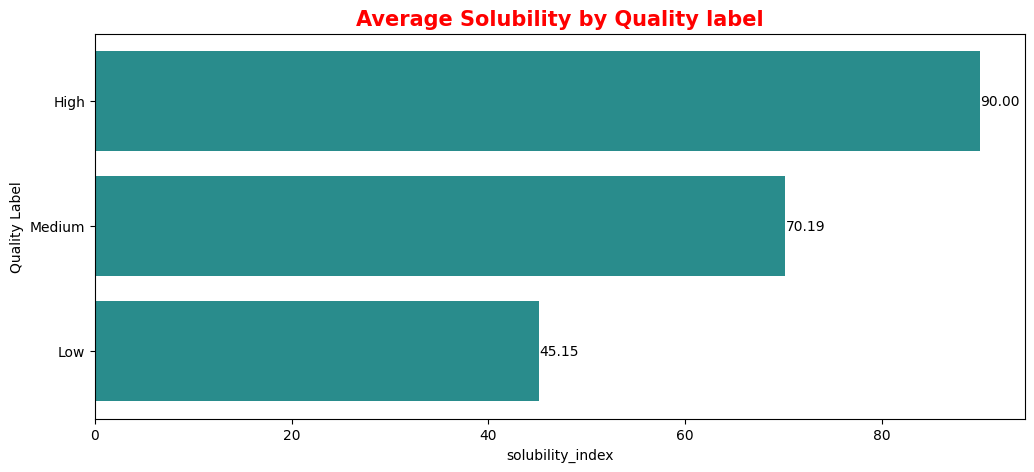

In [23]:
plt.figure(figsize=(12,5))
a=plt.barh(solub['quality_label'],solub['solubility_index'],color='#298c8c') 
plt.bar_label(a,fmt="%.2f")
plt.title("Average Solubility by Quality label",color='r',fontsize=15,fontweight='bold')
plt.ylabel('Quality Label')
plt.xlabel('solubility_index')


In [24]:
details= df.groupby('quality_label', as_index=False) [['moisture_pct','lead_ppm','cadmium_ppm','bcaa_g','leucine_g','denaturation_pct']].mean()\
    .sort_values(by='bcaa_g')
details

,quality_label,moisture_pct,lead_ppm,cadmium_ppm,bcaa_g,leucine_g,denaturation_pct
1,Low,3.976634,0.010067,0.003109,12.118191,4.597396,29.991364
2,Medium,4.010120,0.010169,0.003004,16.474149,6.256286,14.949522
0,High,3.989385,0.009965,0.003075,19.391992,7.357213,4.991776


Text(0, 0.5, 'lead_ppm')

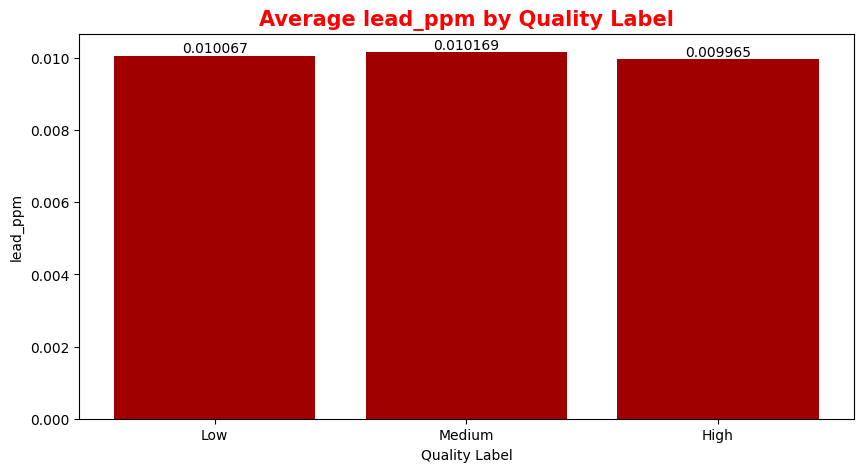

In [25]:
plt.figure(figsize=(10,5))
a=plt.bar(details['quality_label'],details['lead_ppm'],color='#a00000')
plt.bar_label(a,fmt='%f')
plt.title(f"Average lead_ppm by Quality Label",fontsize=15,fontweight='bold',color='r')
plt.xlabel("Quality Label")
plt.ylabel(f"lead_ppm")

Text(0.5, 0, 'bcaa_g')

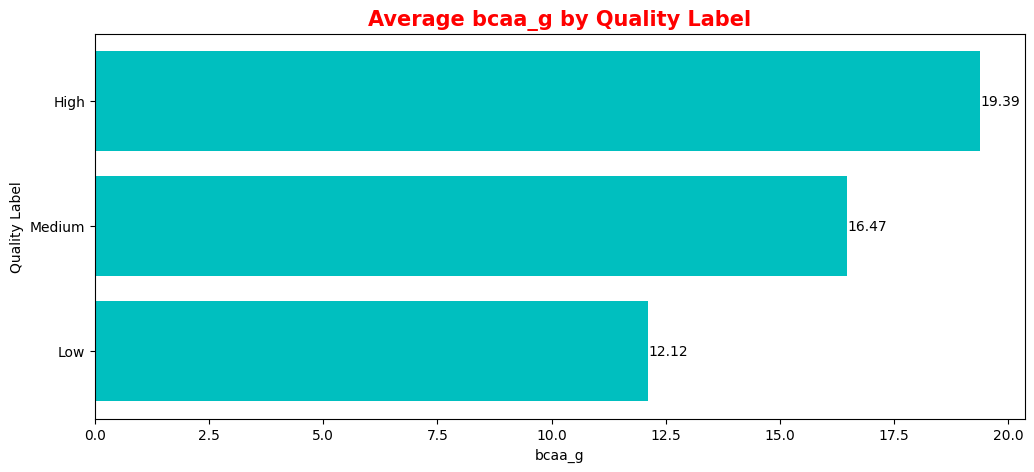

In [26]:
plt.figure(figsize=(12,5))
a=plt.barh(details['quality_label'],details['bcaa_g'],color='c')
plt.bar_label(a,fmt='%.2f')
plt.title(f"Average bcaa_g by Quality Label",fontsize=15,fontweight='bold',color='r')
plt.ylabel("Quality Label")
plt.xlabel(f"bcaa_g")

Text(0.5, 0, 'Leucine_g')

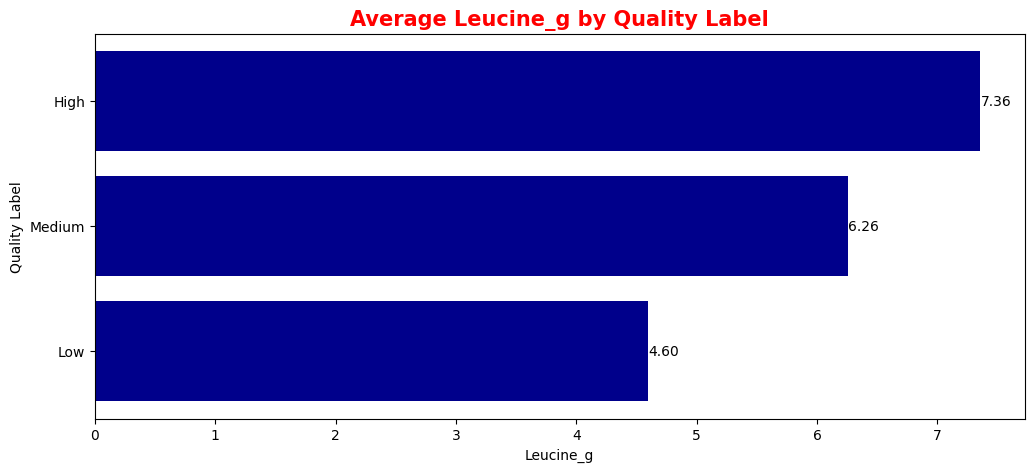

In [27]:
plt.figure(figsize=(12,5))
a=plt.barh(details['quality_label'],details['leucine_g'],color='darkblue')
plt.bar_label(a,fmt='%.2f')
plt.title("Average Leucine_g by Quality Label",fontsize=15,fontweight='bold',color='r')
plt.ylabel("Quality Label")
plt.xlabel("Leucine_g")

Text(0.5, 0, 'denaturation_pct')

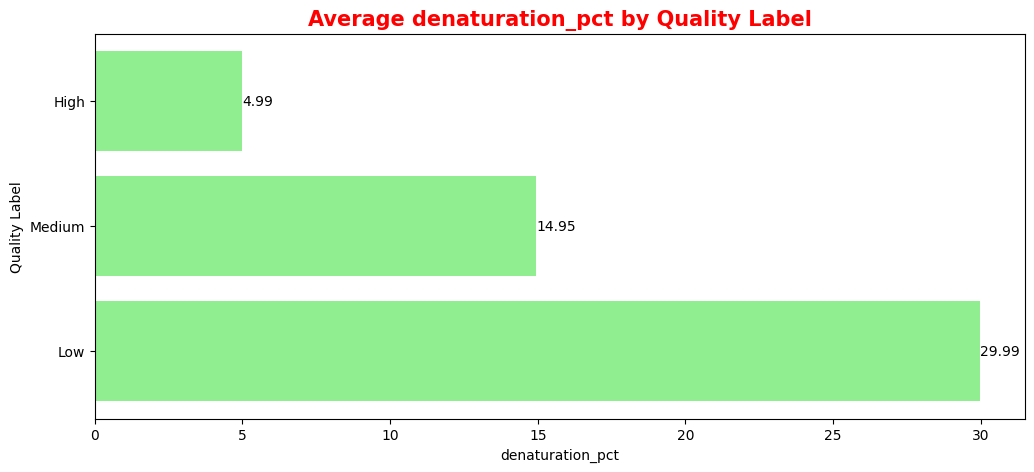

In [28]:
plt.figure(figsize=(12,5))
a=plt.barh(details['quality_label'],details['denaturation_pct'],color='lightgreen')
plt.bar_label(a,fmt='%.2f')
plt.title("Average denaturation_pct by Quality Label",fontsize=15,fontweight='bold',color='r')
plt.ylabel("Quality Label")
plt.xlabel("denaturation_pct")

In [29]:
from scipy.stats import chi2_contingency

for col in df.select_dtypes(include='number'):
    contingency = pd.crosstab(df[col], df['quality_label'])
    chi2, p, dof, ex = chi2_contingency(contingency)
    print(f"{col}: p-value = {p}")
    if p < 0.05:
        print(f"✅ {col} is significantly related to target\n")
    else:
        print(f"❌ {col} is NOT related to target\n")

protein_pct: p-value = 0.0
✅ protein_pct is significantly related to target

carbs_g: p-value = 0.3264892276311052
❌ carbs_g is NOT related to target

fat_g: p-value = 0.5801069435795779
❌ fat_g is NOT related to target

lactose_pct: p-value = 0.8614033448330708
❌ lactose_pct is NOT related to target

ash_pct: p-value = 0.5956850713658774
❌ ash_pct is NOT related to target

moisture_pct: p-value = 0.8361295892396389
❌ moisture_pct is NOT related to target

bcaa_g: p-value = 0.0
✅ bcaa_g is significantly related to target

leucine_g: p-value = 0.0
✅ leucine_g is significantly related to target

solubility_index: p-value = 0.23445727134068192
❌ solubility_index is NOT related to target

denaturation_pct: p-value = 0.049300964128764724
✅ denaturation_pct is significantly related to target

pdcaas: p-value = 0.39224504453295206
❌ pdcaas is NOT related to target

odor_score: p-value = 0.002350545548634443
✅ odor_score is significantly related to target

flavor_score: p-value = 0.00149769583

In [30]:
x=df.drop(['product_id','carbs_g','fat_g','lactose_pct','ash_pct','moisture_pct','solubility_index','pdcaas','lead_ppm','tpc_cfu','ftir_pc2','ftir_pc3','quality_score','quality_label'],axis=1)
y=df['quality_label'].values

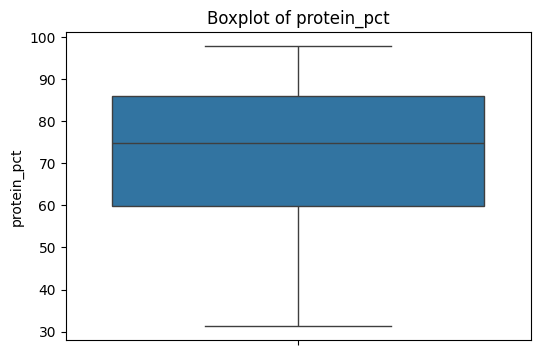

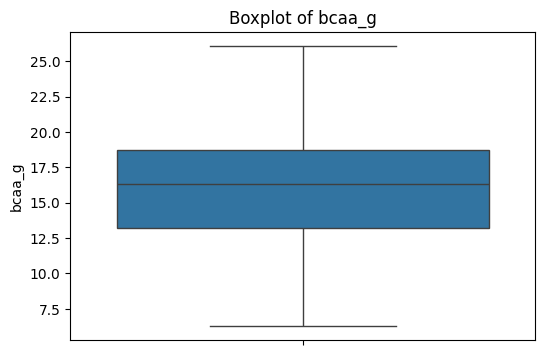

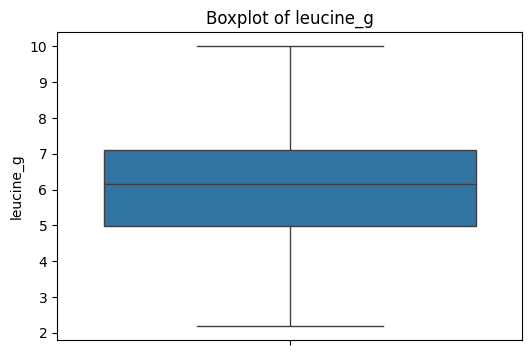

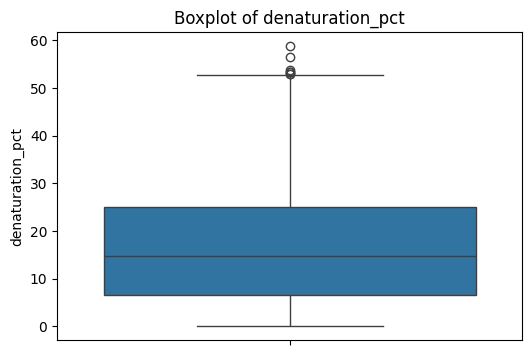

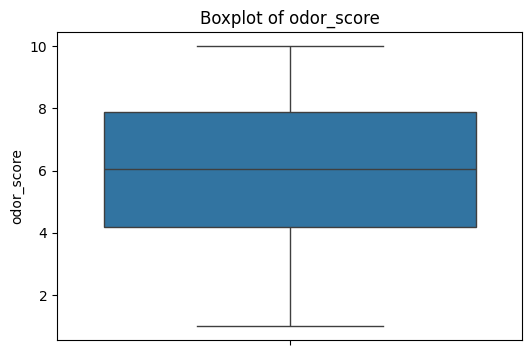

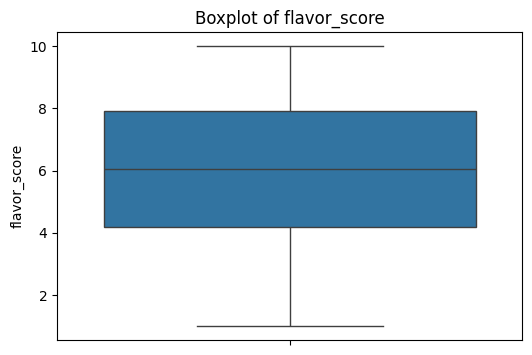

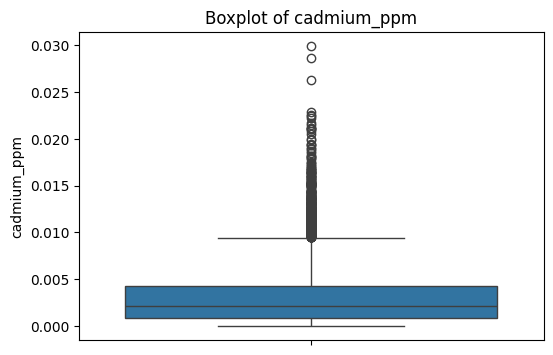

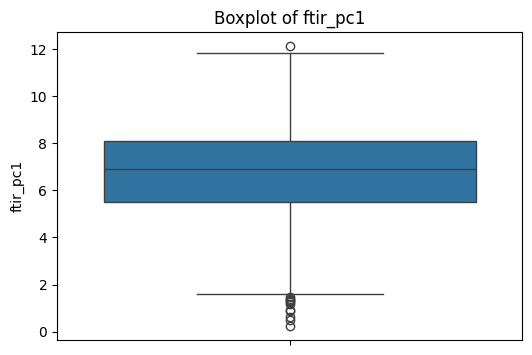

In [31]:
for col in x.select_dtypes(include='number'):
    plt.figure(figsize=(6,4))
    sns.boxplot(y=x[col],data=df)
    plt.title(f"Boxplot of {col}")

In [32]:
x['denaturation_pct'].unique()
x['cadmium_ppm'].unique()
x['ftir_pc1'].unique()

array([ 9.046,  7.002,  8.327, ...,  3.102,  8.762, 10.321], shape=(5277,))

In [33]:
x.loc[x['denaturation_pct']>55,'denaturation_pct']=x['denaturation_pct'].mean()
x.loc[x['cadmium_ppm']>0.020,'cadmium_ppm']=x['cadmium_ppm'].mean()
x.loc[(x['ftir_pc1']>12)|(x['ftir_pc1']<1),'ftir_pc1']=x['ftir_pc1'].mean()

In [34]:
x.isna().sum()
feature=x
feature.columns

Index(['product_type', 'protein_pct', 'bcaa_g', 'leucine_g',
       'denaturation_pct', 'odor_score', 'flavor_score', 'cadmium_ppm',
       'ftir_pc1'],
      dtype='object')

In [35]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
data=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['product_type']),remainder='passthrough')
x=data.fit_transform(x)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
knn=KNeighborsClassifier(n_neighbors=7)
nb=GaussianNB()
sv=SVC()
dtree=DecisionTreeClassifier(criterion='entropy')
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
models=[knn,nb,sv,dtree,rf,ab]
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
model_score=[]
model_labels=['KNN','Naive_Bayes','SVM','Decision_Tree','RandomForest','AdaBoost']


In [39]:
for model in models:
    print(f"Model Name is {model}")
    print("-"*50)
    model.fit(x_train,y_train)
    print(f"Training_score : {model.score(x_train,y_train)*100} \n ")
    y_pred=model.predict(x_test)
    print(f"Confusion matrix: \n {confusion_matrix(y_test,y_pred)} \n")
    score=accuracy_score(y_test,y_pred)*100
    print(f"Accuracy score : {score} \n ")
    model_score.append(score)
    print(classification_report(y_test,y_pred))
    print("-"*50)



Model Name is KNeighborsClassifier(n_neighbors=7)
--------------------------------------------------
Training_score : 99.34276325189313 
 
Confusion matrix: 
 [[1025    0    2]
 [   0  992   12]
 [   8    3  958]] 

Accuracy score : 99.16666666666667 
 
              precision    recall  f1-score   support

        High       0.99      1.00      1.00      1027
         Low       1.00      0.99      0.99      1004
      Medium       0.99      0.99      0.99       969

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

--------------------------------------------------
Model Name is GaussianNB()
--------------------------------------------------
Training_score : 98.99985712244607 
 
Confusion matrix: 
 [[1026    0    1]
 [   0  990   14]
 [   6    9  954]] 

Accuracy score : 99.0 
 
              precision    recall  f1-score   support

        High       0.99      1.00      1.

Text(0, 0.5, 'Accuracy Score')

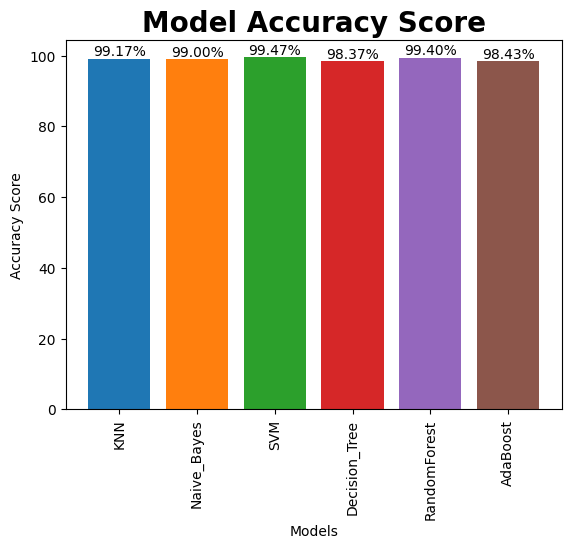

In [40]:
colors = ['#1f77b4','#ff7f0e', '#2ca02c','#d62728','#9467bd','#8c564b']  
a = plt.bar(model_labels, model_score, color=colors)
plt.bar_label(a, fmt='%.2f%%')
plt.title("Model Accuracy Score", fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')


Text(0, 0.5, 'Accuracy Score')

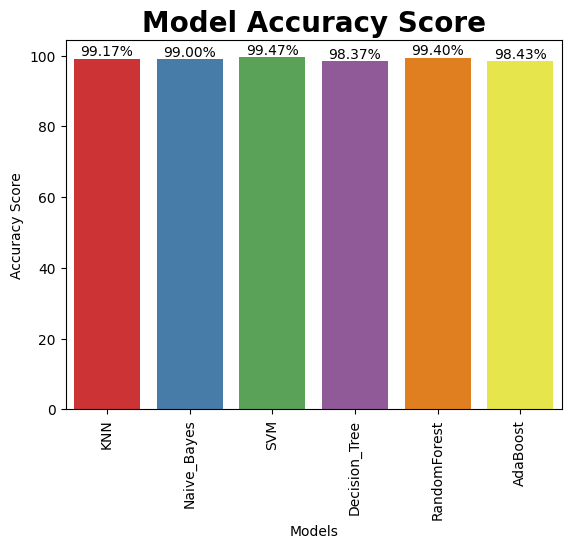

In [41]:
a = sns.barplot(x=model_labels,y=model_score, palette="Set1")
for container in a.containers:
    a.bar_label(container, fmt='%.2f%%')
plt.title("Model Accuracy Score", fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')


In [42]:
new_model=dtree
import joblib
joblib.dump(new_model,'whey_model.joblib')
joblib.dump(data,'onehotencoder.joblib')
joblib.dump(feature,'data.joblib')
joblib.dump(scaler,'scaler.joblib')

['scaler.joblib']